In [29]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# mouse_df.head()
# clinical_df.head()
# mouse_df.dtypes
# clinical_df.dtypes
# mouse_df.count()
# clinical_df.count()

# Combine the data into a single dataset
merged_df = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="inner")

# Display the data table for preview
# merged_df.head()
# merged_df.dtypes
# merged_df.count()


## Tumor Response to Treatment

In [30]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

mean_tumor_grouped_df = merged_df.groupby(['Drug','Timepoint'])
mean_tumor_volume_df = mean_tumor_grouped_df.mean()
mean_tumor_volume_df = mean_tumor_volume_df.drop(['Metastatic Sites'], axis=1)
mean_tumor_volume_df = mean_tumor_volume_df.reset_index(drop=False)
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Avg Volume"}) 

# mean_tumor_volume_df.head
# mean_tumor_volume_df.dtypes
# mean_tumor_volume_df.count()

In [31]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

sem_tumor_grouped_df = merged_df.groupby(['Drug','Timepoint'])
sem_tumor_volume_df = sem_tumor_grouped_df.sem()
sem_tumor_volume_df = sem_tumor_volume_df.drop(['Metastatic Sites','Mouse ID'], axis=1)
sem_tumor_volume_df = sem_tumor_volume_df.reset_index(drop=False)
sem_tumor_volume_df = sem_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"SEM"})

sem_tumor_volume_df.head()
# sem_tumor_volume_df.dtypes
# sem_tumor_volume_df.count()

,Drug,Timepoint,SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [32]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

drug_efficacy_df = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Avg Volume')
drug_sem_df = sem_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='SEM')

# keep Capomulin, Infubinol, Ketapril, and Placebo

drug_efficacy_df.drop(['Ceftamin', 'Naftisol','Propriva', 'Ramicane','Stelasyn', 'Zoniferol'], axis=1, inplace=True)
drug_sem_df.drop(['Ceftamin', 'Naftisol','Propriva', 'Ramicane','Stelasyn', 'Zoniferol'], axis=1, inplace=True)

# drug_efficacy_df.head()
# drug_sem_df.head()

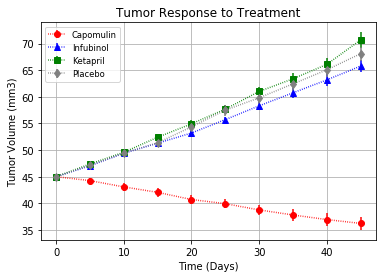

In [33]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

x = drug_efficacy_df.index.to_numpy()
yCapomulin = drug_efficacy_df['Capomulin'].to_numpy()
zCapomulin = drug_sem_df['Capomulin'].to_numpy()
yInfubinol = drug_efficacy_df['Infubinol'].to_numpy()
zInfubinol = drug_sem_df['Infubinol'].to_numpy()
yKetapril = drug_efficacy_df['Ketapril'].to_numpy()
zKetapril = drug_sem_df['Ketapril'].to_numpy()
yPlacebo = drug_efficacy_df['Placebo'].to_numpy()
zPlacebo = drug_sem_df['Placebo'].to_numpy()

fig = plt.figure() 

plt.errorbar(x=x, y=yCapomulin, yerr=zCapomulin, linestyle='--', dashes=(.5, 1), marker='o', color='r', label='Capomulin')
plt.errorbar(x=x, y=yInfubinol, yerr=zInfubinol, linestyle='--', dashes=(.5, 1), marker='^', color='b', label='Infubinol')
plt.errorbar(x=x, y=yKetapril, yerr=zKetapril, linestyle='--', dashes=(.5, 1), marker='s', color='g', label='Ketapril')
plt.errorbar(x=x, y=yPlacebo, yerr=zPlacebo, linestyle='--', dashes=(.5, 1), marker='d', color='.5', label='Placebo')

plt.title("Tumor Response to Treatment")
plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


plt.savefig("../Images/TumorResponseToTreatment.png")

plt.show()

## Metastatic Response to Treatment

In [34]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

meta_site_grouped_df = merged_df.groupby(['Drug','Timepoint'])
meta_site_mean_df = meta_site_grouped_df.mean()
meta_site_mean_df = meta_site_mean_df.drop(['Tumor Volume (mm3)'], axis=1)
meta_site_mean_df = meta_site_mean_df.reset_index(drop=False)

meta_site_mean_df.head()
# meta_site_mean_df.dtypes
# meta_site_mean_df.count()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [35]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

meta_site_sem_grouped_df = merged_df.groupby(['Drug','Timepoint'])
meta_site_sem_df = meta_site_sem_grouped_df.sem()
meta_site_sem_df = meta_site_sem_df.drop(['Tumor Volume (mm3)', 'Mouse ID'], axis=1)
meta_site_sem_df = meta_site_sem_df.reset_index(drop=False)
meta_site_sem_df = meta_site_sem_df.rename(columns={"Metastatic Sites":"Metastatic SEM"})

meta_site_sem_df.head()
# meta_site_sem_df.dtypes
# meta_site_sem_df.count()


,Drug,Timepoint,Metastatic SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [36]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

drug_meta_mean_df = meta_site_mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
drug_meta_sem_df = meta_site_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic SEM')

# keep Capomulin, Infubinol, Ketapril, and Placebo

drug_meta_mean_df.drop(['Ceftamin', 'Naftisol','Propriva', 'Ramicane','Stelasyn', 'Zoniferol'], axis=1, inplace=True)
drug_meta_sem_df.drop(['Ceftamin', 'Naftisol','Propriva', 'Ramicane','Stelasyn', 'Zoniferol'], axis=1, inplace=True)

# drug_meta_mean_df.head()
drug_meta_sem_df.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


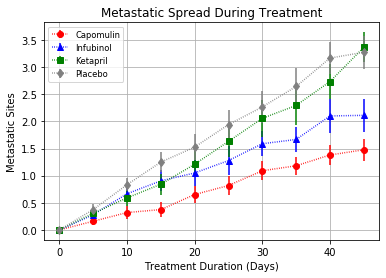

In [37]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

x = drug_meta_mean_df.index.to_numpy()
yCapomulin = drug_meta_mean_df['Capomulin'].to_numpy()
zCapomulin = drug_meta_sem_df['Capomulin'].to_numpy()
yInfubinol = drug_meta_mean_df['Infubinol'].to_numpy()
zInfubinol = drug_meta_sem_df['Infubinol'].to_numpy()
yKetapril = drug_meta_mean_df['Ketapril'].to_numpy()
zKetapril = drug_meta_sem_df['Ketapril'].to_numpy()
yPlacebo = drug_meta_mean_df['Placebo'].to_numpy()
zPlacebo = drug_meta_sem_df['Placebo'].to_numpy()

plt.errorbar(x=x, y=yCapomulin, yerr=zCapomulin, linestyle='--', dashes=(.5, 1), marker='o', color='r', label='Capomulin')
plt.errorbar(x=x, y=yInfubinol, yerr=zInfubinol, linestyle='--', dashes=(.5, 1), marker='^', color='b', label='Infubinol')
plt.errorbar(x=x, y=yKetapril, yerr=zKetapril, linestyle='--', dashes=(.5, 1), marker='s', color='g', label='Ketapril')
plt.errorbar(x=x, y=yPlacebo, yerr=zPlacebo, linestyle='--', dashes=(.5, 1), marker='d', color='.5', label='Placebo')

plt.title("Metastatic Spread During Treatment")
plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()

plt.savefig("../Images/MetastaticSpreadDuringTreatment.png")

plt.show()


## Survival Rates

In [38]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

mouse_grouped_df = merged_df.groupby(['Drug','Timepoint'])
mouse_count_df = (mouse_grouped_df.count()/25)*100
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID":"Survival Rate"})
mouse_count_df = mouse_count_df.drop(['Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)
mouse_count_df = mouse_count_df.reset_index(drop=False)

mouse_count_df.head()
# mouse_count_df.dtypes
# mouse_count_df.count()


,Drug,Timepoint,Survival Rate
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [39]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

mouse_count_pivot_df = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Survival Rate')

# keep Capomulin, Infubinol, Ketapril, and Placebo
mouse_count_pivot_df.drop(['Ceftamin', 'Naftisol','Propriva', 'Ramicane','Stelasyn', 'Zoniferol'], axis=1, inplace=True)

mouse_count_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


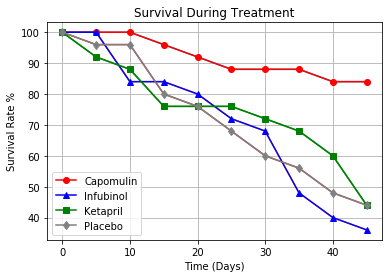

In [40]:
# Generate the Plot (Accounting for percentages)
plt.plot(mouse_count_pivot_df)
plt.plot(mouse_count_pivot_df['Capomulin'], marker='o', color='r', label='Capomulin')
plt.plot(mouse_count_pivot_df['Infubinol'], marker='^', color='b', label='Infubinol')
plt.plot(mouse_count_pivot_df['Ketapril'], marker='s', color='g', label='Ketapril')
plt.plot(mouse_count_pivot_df['Placebo'], marker='d', color='.5', label='Placebo')

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")
plt.grid()
plt.legend(loc='lower left')

# # Save the Figure
plt.savefig("../Images/SurvivalRate.png")

# # Show the Figure
plt.show()

## Summary Bar Graph

In [41]:
# Calculate the percent changes for each drug (total % tumor volume change)

merged_0_45_df = merged_df[(merged_df.Timepoint == 0) | (merged_df.Timepoint == 45)]

merged_0_45_grouped_df = merged_0_45_df.groupby(['Drug','Timepoint'])
mean_0_45_volume_df = merged_0_45_grouped_df.mean()
mean_0_45_volume_df = mean_0_45_volume_df.drop(['Metastatic Sites'], axis=1)
mean_0_45_volume_df = mean_0_45_volume_df.reset_index(drop=False)
mean_0_45_volume_df = mean_0_45_volume_df.rename(columns={"Tumor Volume (mm3)":"Volume at Timepoint"}) 
mean_0_45_volume_df = mean_0_45_volume_df[(mean_0_45_volume_df.Drug == 'Capomulin') | (mean_0_45_volume_df.Drug == 'Infubinol') | (mean_0_45_volume_df.Drug == 'Ketapril') | (mean_0_45_volume_df.Drug == 'Placebo')]
mean_0_45_volume_df

percent_change_df = mean_0_45_volume_df.groupby('Drug',sort=False).apply(lambda x: (x['Volume at Timepoint'].values[0] - x['Volume at Timepoint'].values[-1]) / x['Volume at Timepoint'].values[0] * -100).reset_index(name='Percent Change')
percent_change_df

# Display the data to confirm
percent_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


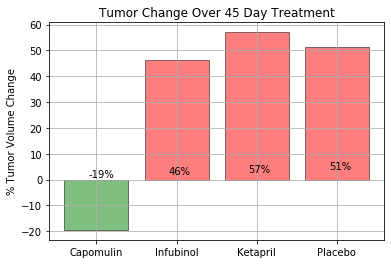

In [42]:
# Store all Relevant Percent Changes into a Tuple
subset = percent_change_df[['Drug', 'Percent Change']]
tuples = [tuple(x) for x in subset.values]

# Splice the data between passing and failing drugs
drugs_x, percent_change_y = zip(*tuples)

drug_list = list(drugs_x)
percent_change_list = list(percent_change_y)

colors = []
for percent_change in percent_change_list: 
    if percent_change < 0:
        colors.append('g')
    else:
        colors.append('r')
        
plt.bar(drugs_x, percent_change_y, color=colors, alpha=0.5, align='center', edgecolor='black')
    
plt.title('Tumor Change Over 45 Day Treatment')
plt.grid()
plt.ylabel("% Tumor Volume Change")

# Create rows, columns and labels
rows = [1,2,3,4]
columns = [1,2,3,4]
labels = []
for i in percent_change_list:
    labels.append("%.0f%%" % (i)) 

# Text on the top of each barplot
for i in range(len(percent_change_list)):
    plt.text(x = rows[i]-1.1, y = columns[i]+0, s = labels[i], size = 10)#, color='white')

plt.show()